In [1]:
import pandas as pd

# 创建一个销售数据的 DataFrame
data = {
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    'Product': ['A', 'B', 'A', 'B', 'A'],
    'Quantity': [10, 15, 20, 25, 30],
    'Revenue': [100, 150, 200, 250, 300]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 保存为 CSV 文件
df.to_csv('sales_data.csv', index=False)

print("销售数据已保存为 sales_data.csv")

销售数据已保存为 sales_data.csv


In [2]:
# 读取 CSV 文件
df = pd.read_csv('sales_data.csv')

print("读取的销售数据：")
print(df)

读取的销售数据：
         Date Product  Quantity  Revenue
0  2024-01-01       A        10      100
1  2024-01-01       B        15      150
2  2024-01-02       A        20      200
3  2024-01-02       B        25      250
4  2024-01-03       A        30      300


In [3]:
# 创建数据透视表，按日期和产品分组，计算总销售额
pivot_table = df.pivot_table(values='Revenue', index='Date', columns='Product', aggfunc='sum', fill_value=0)

print("\n数据透视表：")
print(pivot_table)


数据透视表：
Product       A    B
Date                
2024-01-01  100  150
2024-01-02  200  250
2024-01-03  300    0


In [4]:
# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 设置日期列为索引
df.set_index('Date', inplace=True)

print("\n设置日期列为索引：")
print(df)

# 按日期筛选数据
print("\n2024-01-02 的数据：")
print(df.loc['2024-01-02'])


设置日期列为索引：
           Product  Quantity  Revenue
Date                                 
2024-01-01       A        10      100
2024-01-01       B        15      150
2024-01-02       A        20      200
2024-01-02       B        25      250
2024-01-03       A        30      300

2024-01-02 的数据：
           Product  Quantity  Revenue
Date                                 
2024-01-02       A        20      200
2024-01-02       B        25      250


In [ ]:
# 创建多级索引
df_multi = df.set_index(['Date', 'Product'])

print("\n多级索引的 DataFrame:")
print(df_multi)

# 通过多级索引访问数据
print("\n访问 2024-01-01 的产品 A 的数据:")
print(df_multi.loc[('2024-01-01', 'A')])

In [6]:
# 按产品分组，计算总销售额和平均销售数量
grouped = df.groupby('Product').agg({'Revenue': 'sum', 'Quantity': 'mean'})

print("\n按产品分组的聚合结果：")
print(grouped)


按产品分组的聚合结果：
         Revenue  Quantity
Product                   
A            600      20.0
B            400      20.0


In [7]:
# 筛选销售额大于 200 的记录
filtered_df = df[df['Revenue'] > 200]

print("\n销售额大于 200 的记录：")
print(filtered_df)

# 应用条件，为销售额大于 200 的记录添加标签
df['HighRevenue'] = df['Revenue'] > 200

print("\n添加标签后的 DataFrame：")
print(df)


销售额大于 200 的记录：
           Product  Quantity  Revenue
Date                                 
2024-01-02       B        25      250
2024-01-03       A        30      300

添加标签后的 DataFrame：
           Product  Quantity  Revenue  HighRevenue
Date                                              
2024-01-01       A        10      100        False
2024-01-01       B        15      150        False
2024-01-02       A        20      200        False
2024-01-02       B        25      250         True
2024-01-03       A        30      300         True


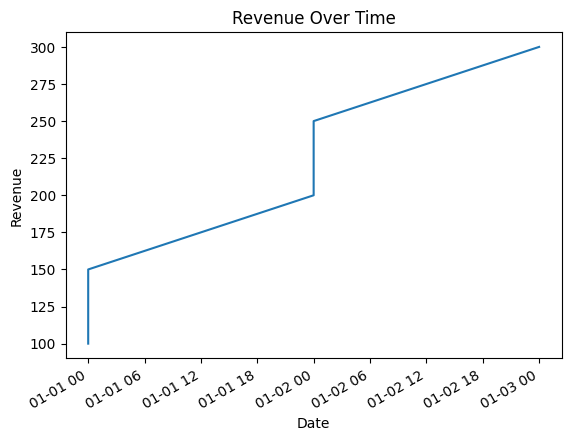

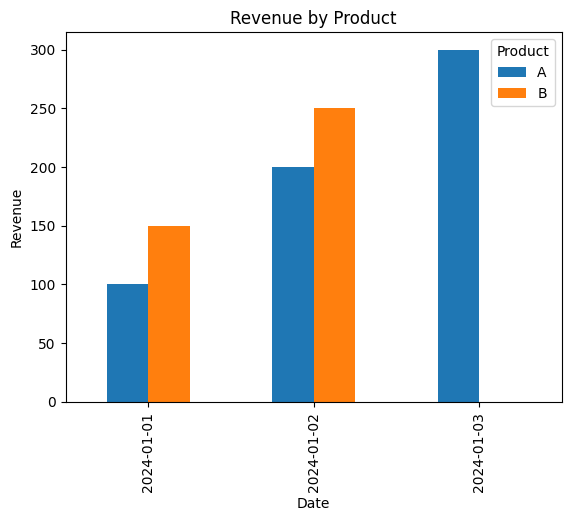

In [8]:
import matplotlib.pyplot as plt

# 绘制销售额的时间序列图
df['Revenue'].plot(kind='line', title='Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# 绘制产品销售额的柱状图
pivot_table.plot(kind='bar', title='Revenue by Product')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Product')
plt.show()

In [9]:
# 保存修改后的 DataFrame
df.to_csv('sales_data_modified.csv', index=True)

print("\n修改后的销售数据已保存为 sales_data_modified.csv")


修改后的销售数据已保存为 sales_data_modified.csv
